In [1]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation

# read in data
SAMI_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')
HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
HSC_G09_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g09randisprimcorrect.fits')


In [4]:
# set misssing RE_CIRC values to mean of G09, then make 5RE_CIRC_MPC col
maskedID = SAMI_G09_gals['RE_CIRC_KPC'].mask.nonzero()[0]
print(maskedID)
check = []

for i in maskedID:
    SAMI_G09_gals['RE_CIRC_KPC'][i] = np.mean(SAMI_G09_gals['RE_CIRC_KPC'])
    
print(SAMI_G09_gals['RE_CIRC_KPC'].mask.nonzero()[0])

for i in range(len(SAMI_G09_gals)):
    if SAMI_G09_gals['RE_CIRC_KPC'][i] == np.mean(SAMI_G09_gals["RE_CIRC_KPC"][i]):
        check.append(i)

SAMI_G09_gals['5_RE_CIRC_MPC'] = SAMI_G09_gals['RE_CIRC_KPC']*(5/1000)
SAMI_G09_gals.info()
SAMI_G09_gals.write('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits',overwrite=True)

[109 157 172 175 253 266 311 371 384 399 410 416 421 477 497 575 616 619]
[]
<Table length=676>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn     0
        ELLIP float64           MaskedColumn    18
   LAMBDAR_RE float64           MaskedColumn   286
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0
5_RE_CIRC_MPC float64           MaskedColumn     0


In [2]:
# now repeat for various z 
redshifts = [0.125]

for k in redshifts:
    
    print("starting z <",k)
    
    CATIDS = np.zeros(len(SAMI_G09_gals),dtype=int)
    RE_CIRC_KPC = np.zeros(len(SAMI_G09_gals))
    #object_ids = np.full((len(SAMI_G09_gals),60000),np.nan)
    distances = np.full((len(SAMI_G09_gals),51000),np.nan)
    #HSC_ra = np.full((len(SAMI_G09_gals),60000),np.nan)
    #HSC_dec = np.full((len(SAMI_G09_gals),60000),np.nan)
    #HSC_photoz = np.full((len(SAMI_G09_gals),60000),np.nan)
    HSC_count = 0

    for i in range(len(SAMI_G09_gals)):
        ang_diam_1rad = SAMI_G09_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G09_gals['CATID'][i]
        RE_CIRC_KPC[i] = SAMI_G09_gals['RE_CIRC_KPC'][i]
        col = 0

        for j in range(len(HSC_G09_gals)):

#            if HSC_G09_gals['photoz_median'][j] <= k:
            HSC_count += 1
            ang_sep = angular_separation(SAMI_G09_gals['RA_RAD'][i],SAMI_G09_gals['DEC_RAD'][i],
                                HSC_G09_gals['ra_rad'][j],HSC_G09_gals['dec_rad'][j])
            sep = ang_sep*ang_diam_1rad

            if SAMI_G09_gals['5_RE_CIRC_MPC'][i] < sep < 20:
                #object_ids[i][col] = HSC_G09_gals['object_id'][j]
                #HSC_ra[i][col] = HSC_G09_gals['ra'][j]
                #HSC_dec[i][col] = HSC_G09_gals['dec'][j]
                #HSC_photoz[i][col] = HSC_G09_gals['photoz_median'][j]
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G09_gals),"done")

    HSC_count = int(HSC_count/len(SAMI_G09_gals))
    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RE_CIRC_KPC'] = RE_CIRC_KPC
    #chunk['OBJECT_ID'] = object_ids
    chunk['DISTANCE'] = distances
    distances = 0
    #chunk['HSC_RA'] = HSC_ra
    #chunk['HSC_DEC'] = HSC_dec
    #chunk['HSC_PHOTOZ'] = HSC_photoz
    print("HSC_count:",HSC_count)

    chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_reals_zlt{}_20Mpc_5REmin.fits'.format(k),overwrite=True)


starting z < 0.125
1 / 676 done
2 / 676 done
3 / 676 done
4 / 676 done
5 / 676 done
6 / 676 done
7 / 676 done
8 / 676 done
9 / 676 done
10 / 676 done
11 / 676 done
12 / 676 done
13 / 676 done
14 / 676 done
15 / 676 done
16 / 676 done
17 / 676 done
18 / 676 done
19 / 676 done
20 / 676 done
21 / 676 done
22 / 676 done
23 / 676 done
24 / 676 done
25 / 676 done
26 / 676 done
27 / 676 done
28 / 676 done
29 / 676 done
30 / 676 done
31 / 676 done
32 / 676 done
33 / 676 done
34 / 676 done
35 / 676 done
36 / 676 done
37 / 676 done
38 / 676 done
39 / 676 done
40 / 676 done
41 / 676 done
42 / 676 done
43 / 676 done
44 / 676 done
45 / 676 done
46 / 676 done
47 / 676 done
48 / 676 done
49 / 676 done
50 / 676 done
51 / 676 done
52 / 676 done
53 / 676 done
54 / 676 done
55 / 676 done
56 / 676 done
57 / 676 done
58 / 676 done
59 / 676 done
60 / 676 done
61 / 676 done
62 / 676 done
63 / 676 done
64 / 676 done
65 / 676 done
66 / 676 done
67 / 676 done
68 / 676 done
69 / 676 done
70 / 676 done
71 / 676 d

554 / 676 done
555 / 676 done
556 / 676 done
557 / 676 done
558 / 676 done
559 / 676 done
560 / 676 done
561 / 676 done
562 / 676 done
563 / 676 done
564 / 676 done
565 / 676 done
566 / 676 done
567 / 676 done
568 / 676 done
569 / 676 done
570 / 676 done
571 / 676 done
572 / 676 done
573 / 676 done
574 / 676 done
575 / 676 done
576 / 676 done
577 / 676 done
578 / 676 done
579 / 676 done
580 / 676 done
581 / 676 done
582 / 676 done
583 / 676 done
584 / 676 done
585 / 676 done
586 / 676 done
587 / 676 done
588 / 676 done
589 / 676 done
590 / 676 done
591 / 676 done
592 / 676 done
593 / 676 done
594 / 676 done
595 / 676 done
596 / 676 done
597 / 676 done
598 / 676 done
599 / 676 done
600 / 676 done
601 / 676 done
602 / 676 done
603 / 676 done
604 / 676 done
605 / 676 done
606 / 676 done
607 / 676 done
608 / 676 done
609 / 676 done
610 / 676 done
611 / 676 done
612 / 676 done
613 / 676 done
614 / 676 done
615 / 676 done
616 / 676 done
617 / 676 done
618 / 676 done
619 / 676 done
620 / 676 

shuffle complete 1209350 randoms selected!


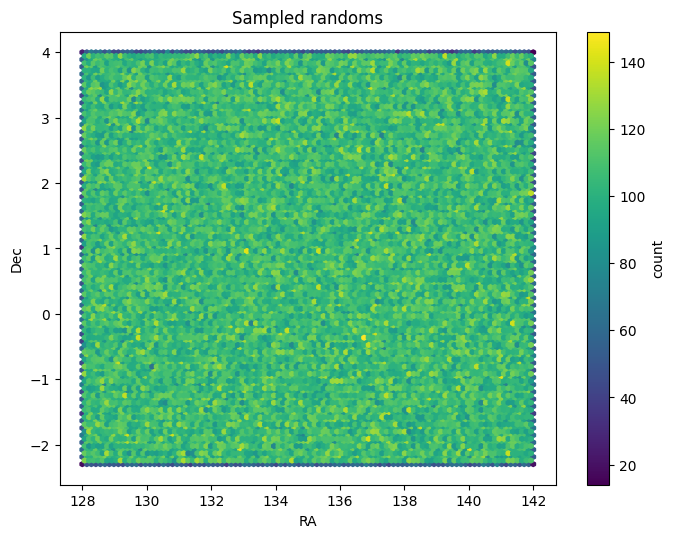

starting z < 0.125
1 / 676 done
2 / 676 done
3 / 676 done
4 / 676 done
5 / 676 done
6 / 676 done
7 / 676 done
8 / 676 done
9 / 676 done
10 / 676 done
11 / 676 done
12 / 676 done
13 / 676 done
14 / 676 done
15 / 676 done
16 / 676 done
17 / 676 done
18 / 676 done
19 / 676 done
20 / 676 done
21 / 676 done
22 / 676 done
23 / 676 done
24 / 676 done
25 / 676 done
26 / 676 done
27 / 676 done
28 / 676 done
29 / 676 done
30 / 676 done
31 / 676 done
32 / 676 done
33 / 676 done
34 / 676 done
35 / 676 done
36 / 676 done
37 / 676 done
38 / 676 done
39 / 676 done
40 / 676 done
41 / 676 done
42 / 676 done
43 / 676 done
44 / 676 done
45 / 676 done
46 / 676 done
47 / 676 done
48 / 676 done
49 / 676 done
50 / 676 done
51 / 676 done
52 / 676 done
53 / 676 done
54 / 676 done
55 / 676 done
56 / 676 done
57 / 676 done
58 / 676 done
59 / 676 done
60 / 676 done
61 / 676 done
62 / 676 done
63 / 676 done
64 / 676 done
65 / 676 done
66 / 676 done
67 / 676 done
68 / 676 done
69 / 676 done
70 / 676 done
71 / 676 d

554 / 676 done
555 / 676 done
556 / 676 done
557 / 676 done
558 / 676 done
559 / 676 done
560 / 676 done
561 / 676 done
562 / 676 done
563 / 676 done
564 / 676 done
565 / 676 done
566 / 676 done
567 / 676 done
568 / 676 done
569 / 676 done
570 / 676 done
571 / 676 done
572 / 676 done
573 / 676 done
574 / 676 done
575 / 676 done
576 / 676 done
577 / 676 done
578 / 676 done
579 / 676 done
580 / 676 done
581 / 676 done
582 / 676 done
583 / 676 done
584 / 676 done
585 / 676 done
586 / 676 done
587 / 676 done
588 / 676 done
589 / 676 done
590 / 676 done
591 / 676 done
592 / 676 done
593 / 676 done
594 / 676 done
595 / 676 done
596 / 676 done
597 / 676 done
598 / 676 done
599 / 676 done
600 / 676 done
601 / 676 done
602 / 676 done
603 / 676 done
604 / 676 done
605 / 676 done
606 / 676 done
607 / 676 done
608 / 676 done
609 / 676 done
610 / 676 done
611 / 676 done
612 / 676 done
613 / 676 done
614 / 676 done
615 / 676 done
616 / 676 done
617 / 676 done
618 / 676 done
619 / 676 done
620 / 676 

In [3]:
# now repeat for randoms, using right number of objects (based on redshift cut)
chunk = 0
# Counts: [0.275, 0.25] = [432462, 346876]

# now repeat for various z 
redshifts = [0.125]
HSC_count = 48374

# these were obtained from the reals calculation

for k in range(len(redshifts)):
    
    random_sample_size = HSC_count*25
    indices = np.random.randint(len(HSC_G09_rands), size = random_sample_size)
    print("shuffle complete", len(indices), "randoms selected!")
    
    plt.figure(figsize=(8,6),dpi=100)
    plt.hexbin(HSC_G09_rands[indices]['ra'],HSC_G09_rands[indices]['dec'])
    plt.xlabel("RA")
    plt.ylabel("Dec")
    plt.title("Sampled randoms")
    cb=plt.colorbar()
    cb.set_label('count')
    plt.show()
    
    print("starting z <",redshifts[k])

    CATIDS = np.zeros(len(SAMI_G09_gals),dtype = int)
    RA = np.zeros(len(SAMI_G09_gals))
    DEC = np.zeros(len(SAMI_G09_gals))
    Z = np.zeros(len(SAMI_G09_gals))
    distances = np.full((len(SAMI_G09_gals),51000*25),np.nan)

    for i in range(len(SAMI_G09_gals)):
        ang_diam_1rad = SAMI_G09_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G09_gals['CATID'][i]
        RA[i] = SAMI_G09_gals['RA'][i]
        DEC[i] = SAMI_G09_gals['DEC'][i]
        Z[i] = SAMI_G09_gals['Z_SPEC'][i]

        col = 0

        for j in range(random_sample_size):      
            ang_sep = angular_separation(SAMI_G09_gals['RA_RAD'][i],SAMI_G09_gals['DEC_RAD'][i],
                                HSC_G09_rands['ra_rad'][indices[j]],HSC_G09_rands['dec_rad'][indices[j]])
            sep = ang_sep*ang_diam_1rad

            # ignore matches with 5 effective radii
            if SAMI_G09_gals['5_RE_CIRC_MPC'][i] < sep < 20:
                
                # convert to kpc
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G09_gals),"done")

        
# form table, wipe massive arrays when done to reduce memory load        
    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RA'] = RA
    chunk['DEC'] = DEC
    chunk['Z'] = Z
    chunk['RAND_DISTANCE'] = distances
    distances = 0
    
    chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_{}_20Mpc_25xrand_5REmin.fits'.format(redshifts[k]),overwrite=True)
    print("written to file")
    
    # 1:37pm start

In [4]:
chunk = 0

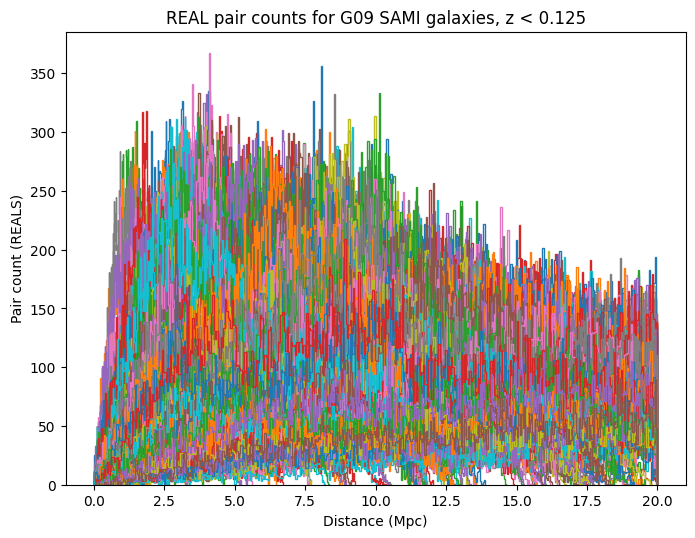

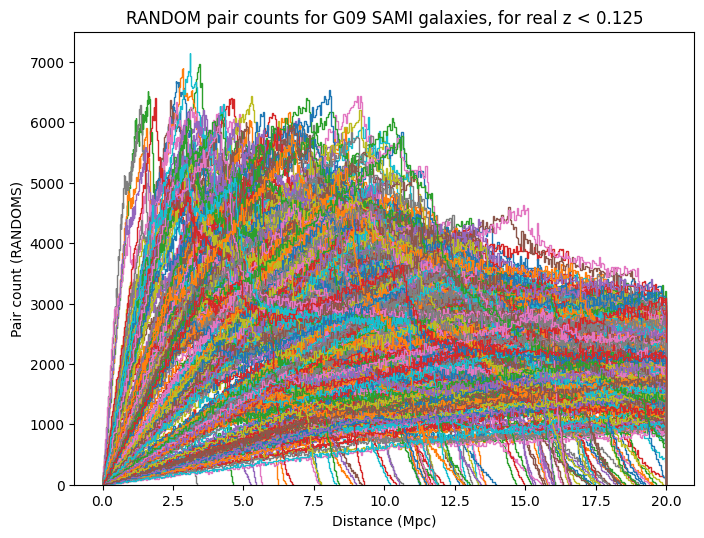

In [5]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']


def paircounthist(redshifts):
    for i in redshifts:

        reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_reals_zlt0.125_20Mpc_5REmin.fits')
        rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc_25xrand_5REmin.fits')

        plt.figure(figsize=(8,6),dpi=100)
        for j in range(len(reals)):
            plt.hist(reals['DISTANCE'][j],bins=400,histtype='step',fill=False)
        plt.xlabel("Distance (Mpc)")
        plt.ylabel("Pair count (REALS)")
        plt.title("REAL pair counts for G09 SAMI galaxies, z < {}".format(i))
        

        
        plt.figure(figsize=(8,6),dpi=100)
        for j in range(len(rands)):
            plt.hist(rands['RAND_DISTANCE'][j],bins=400,histtype='step',fill=False)
        plt.xlabel("Distance (Mpc)")
        plt.ylabel("Pair count (RANDOMS)")
        plt.title("RANDOM pair counts for G09 SAMI galaxies, for real z < {}".format(i))

        
    return
 
paircounthist(redshifts)

read in complete (z < 0.125)


/tmp/ipykernel_16911/848409219.py:26: RuntimeWarning: divide by zero encountered in divide
  ratio = (n_real / n_rand)*randfactor


50 complete
100 complete
200 complete
500 complete
1000 complete
saved (z < 0.125)


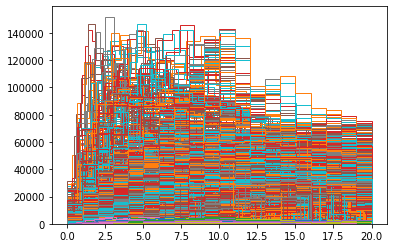

In [7]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']

binwidth = [50,100,200,500,1000]
searchradius = 20000
randfactor = 25 
    
reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_reals_0.125_20Mpc_5REmin.fits')
rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc_25xrand_5REmin.fits')
print("read in complete")

for k in binwidth:

    ratios = np.zeros(searchradius//k)

    # calculate the ratio
    for j in range(len(reals)):
        n_real,bin_real,patches = plt.hist(reals['DISTANCE'][j],bins=searchradius//k,
                                                              histtype='step',fill=False)

        n_rand,bin_rand,patches = plt.hist(rands['RAND_DISTANCE'][j],bins=searchradius//k,
                                                              histtype='step',fill=False)

        ratio = (n_real / n_rand)*randfactor
        ratios = np.vstack((ratios,ratio))

    # clean up, remove zeros row and infs
    ratios = np.delete(ratios,0,0)
    xis = ratios-1
#         countinf = 0
#         countminus1 = 0
#         for row in range(xis.shape[0]):
#             for col in range(xis.shape[1]):
#                 if np.isinf(xis[row,col]):
#                     countinf += 1
#                     xis[row,col] = np.nan
#                 if xis[row,col] == -1:
#                     xis[row,col] = np.nan
#                     countminus1 += 1

#         print(k,"countinf: ",countinf)
#         print(k,"countminus1: ",countminus1)  

    reals['xi{}raw'.format(k)] = xis

    print(k,"complete")

reals.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_reals_zlt_0.125_20Mpc_25xrand_5REmin.fits',overwrite=True)
print("saved")


#     # plot all xi's 
#     plt.figure(figsize=(8,6),dpi=100)
#     radii = [25,75,125,175,225,275,325,375,425,475,525,575,625,675,725,775,825,875,925,975]
#     for k in range(len(reals)):
#         plt.plot(radii,xis[k])

#     plt.xlabel('Distance (kpc)')
#     plt.ylabel(r'$\xi(r)$')
#     plt.title("Correlation functions for G09 SAMI (HSC z < {})".format(i))
#     plt.show()

#     return

# xiplots(redshiftsall)

# def meanxi(redshifts):        
#         # plot mean xi
#         meanratios = np.nanmean(xis,axis=0)
#         plt.figure(figsize=(8,6),dpi=100)
#         #yerr=np.nanstd(xis,axis=0),capsize=3,
#         plt.errorbar(radii,meanratios,label='z < {}'.format(i))
#         plt.xlabel('Distance (kpc)')
#         plt.ylabel(r'$\xi(r)$')
#         plt.title("Mean correlation function for G09 SAMI (HSC z < {})".format(i))
#         plt.legend()
#         plt.show()
#         return

# xiplots(redshifts)

read in complete (z < 0.125)


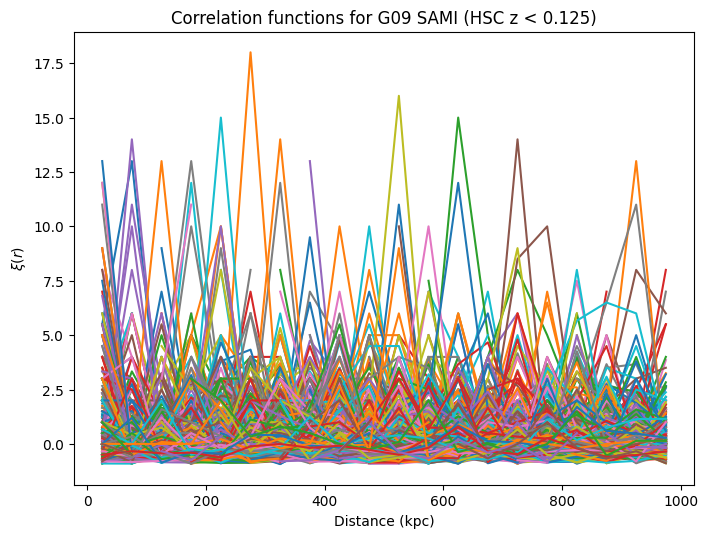

In [25]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']

radii = []
start = 25
step = 50
end = 975
x = start
while x <= end:
    radii.append(x)
    x += 50
    
    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_reals_zlt{}.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    
    # plot all xi's 
    plt.figure(figsize=(8,6),dpi=100)
    
    for k in range(len(reals)):
        plt.plot(radii,reals['xi50'][k])

    plt.xlabel('Distance (kpc)')
    plt.ylabel(r'$\xi(r)$')
    plt.title("Correlation functions for G09 SAMI (HSC z < {})".format(i))
    
#     filename = "/suphys/fscu5535/HSC_work/figures/G12_corrfuncs{}.png".format(i)
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#     plt.clf()


read in complete (z < 0.125)


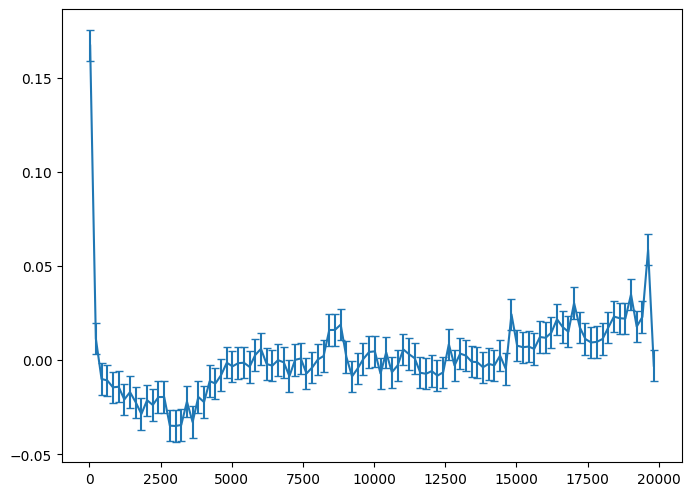

In [18]:
#redshiftsall = ['0.1','0.125','0.15','0.175','0.2','0.225','0.25','0.275','0.3']
redshifts = ['0.125']
radii = []
start = 25
step = 200
end = 19975
x = start
while x <= end:
    radii.append(x)
    x += step

plt.figure(figsize=(8,6),dpi=100)    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_reals_zlt0.125_20Mpc.fits')
    print("read in complete (z < {})".format(i))
    
    # plot mean xi with errors

    points = np.array(reals['xi200'])
    meanratios = np.nanmean(points,axis=0)
    #print("z < {}".format(i),meanratios)
    counts = []

    for j in range(100):
        counts.append(np.count_nonzero(~np.isnan(points[:,j])))
    #print(i,"Non-nan counts for each bin:",counts)
    
    plt.errorbar(radii,meanratios,yerr=np.nanstd(points)/np.sqrt(counts),capsize=3)
    
# plt.xlabel('Distance (kpc)')
# plt.ylabel(r'$\xi(r)$')
# plt.title(r"Mean correlation function for G09 SAMI (with SEM)".format(i))
# filename = "/suphys/fscu5535/HSC_work/figures/G09meancorrfuncs0.125.png".format(i)
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)   

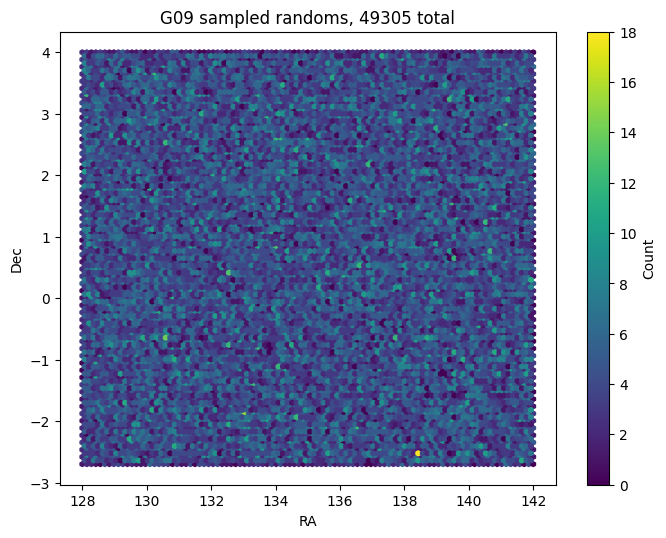

In [7]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(HSC_G09_rands[indices]['ra'],HSC_G09_rands[indices]['dec'])
plt.title("G09 sampled randoms, {} total".format(len(indices)))
plt.xlabel("RA")
plt.ylabel("Dec")
cb=plt.colorbar()
cb.set_label('Count')
filename = "/suphys/fscu5535/HSC_work/figures/G09sampledrandoms0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

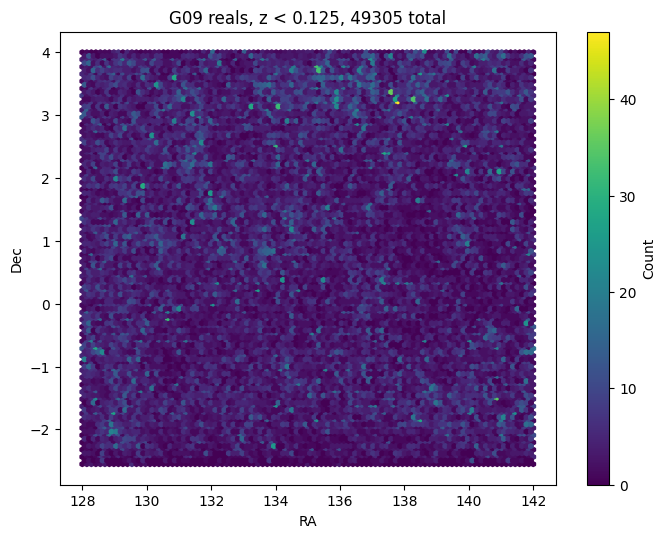

In [8]:
goodra = []
gooddec = []

for i in range(len(HSC_G09_gals)):
    if HSC_G09_gals['photoz_median'][i] <= 0.125:
        goodra.append(HSC_G09_gals['ra'][i])
        gooddec.append(HSC_G09_gals['dec'][i])
        

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(goodra,gooddec)
plt.title("G09 reals, z < 0.125, {} total".format(len(goodra)))
plt.xlabel("RA")
plt.ylabel("Dec")
cb=plt.colorbar()
cb.set_label('Count')
filename = "/suphys/fscu5535/HSC_work/figures/G09realsdist.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

In [28]:
print("real dec min:",np.min(gooddec))
print("real dec max:",np.max(gooddec))

print("real ra min:",np.min(goodra))
print("real ra max:",np.max(goodra))


print("RAND (sampled) dec min:",np.min(HSC_G09_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G09_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G09_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G09_rands[indices]['ra']))

print("RAND (all) dec min:",np.min(HSC_G09_rands['dec']))
print("RAND (all) dec max:",np.max(HSC_G09_rands['dec']))
print("RAND (all) ra min:",np.min(HSC_G09_rands['ra']))
print("RAND (all) ra max:",np.max(HSC_G09_rands['ra']))

real dec min: -2.5534840583708127
real dec max: 3.99991845176968
real ra min: 128.0003470591094
real ra max: 141.9999484734186
RAND (sampled) dec min: -2.5534255259691094
RAND (sampled) dec max: 3.99980177255866
RAND (sampled) ra min: 128.00021644858398
RAND (sampled) ra max: 141.99991445086417
RAND (all) dec min: -2.553483987017473
RAND (all) dec max: 3.999999914085134
RAND (all) ra min: 128.00000030427708
RAND (all) ra max: 141.99999916410866


In [14]:
# fix new data
HSC_G09_rands['ra_rad'] = HSC_G09_rands['ra']*(np.pi/180)
HSC_G09_rands['dec_rad'] = HSC_G09_rands['dec']*(np.pi/180)

HSC_G09_rands.write('/suphys/fscu5535/HSC_work/mod_data/g09randisprimcorrect.fits',overwrite=True)

In [8]:
chunk.info()

<QTable length=676>
     name       dtype    shape      n_bad  
-------------- ------- ---------- ---------
         CATID   int64                    0
            RA float64                    0
           DEC float64                    0
             Z float64                    0
RAND_OBJECT_ID float64 (1450000,) 410428916
 RAND_DISTANCE float64 (1450000,) 410428916
   RAND_HSC_RA float64 (1450000,) 410428916
  RAND_HSC_DEC float64 (1450000,) 410428916


In [9]:
chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_{}_20Mpc_25xrand.fits'.format(redshifts[k]),overwrite=True)

MemoryError: Unable to allocate 29.2 GiB for an array with shape (676,) and data type [('CATID', '<i8'), ('RA', '<f8'), ('DEC', '<f8'), ('Z', '<f8'), ('RAND_OBJECT_ID', '<f8', (1450000,)), ('RAND_DISTANCE', '<f8', (1450000,)), ('RAND_HSC_RA', '<f8', (1450000,)), ('RAND_HSC_DEC', '<f8', (1450000,))]

In [10]:
chunk.remove_columns(['RAND_HSC_RA','RAND_HSC_DEC','RAND_OBJECT_ID'])

In [11]:
chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_{}_20Mpc_25xrand.fits'.format(redshifts[k]),overwrite=True)

In [17]:
rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc.fits')

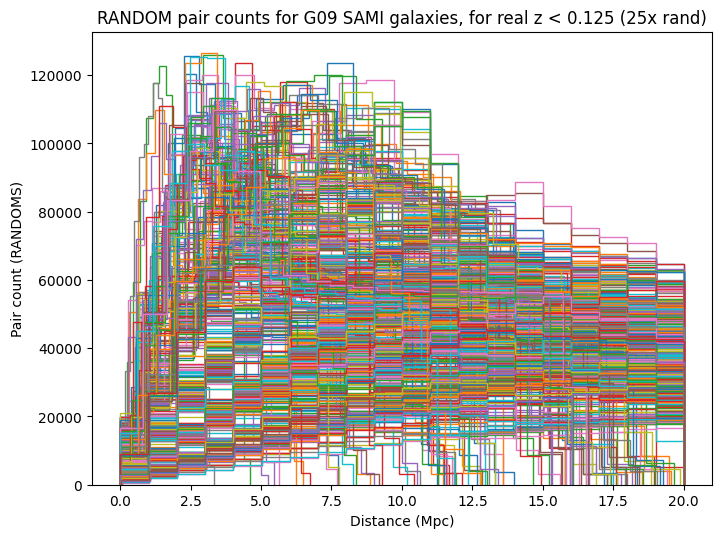

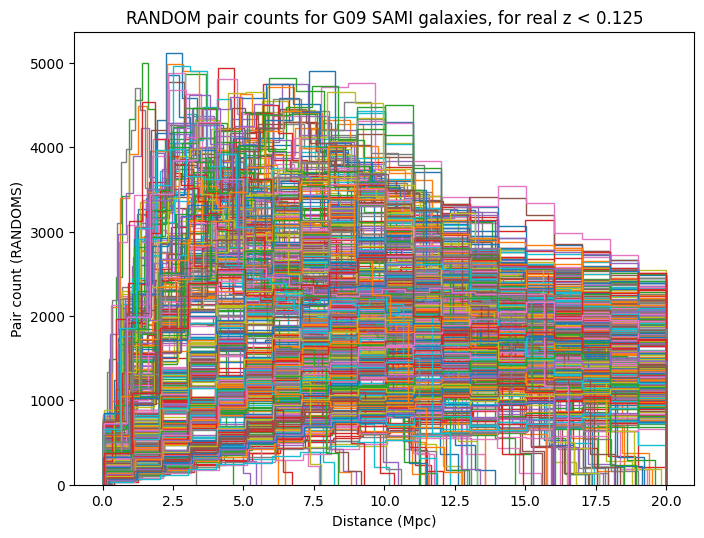

In [20]:
rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc.fits')

plt.figure(figsize=(8,6),dpi=100)
for j in range(len(chunk)):
    plt.hist(chunk['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for G09 SAMI galaxies, for real z < 0.125 (25x rand)".format(i))

filename = "/suphys/fscu5535/HSC_work/figures/G09rands20Mpc25x.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
for j in range(len(rands)):
    plt.hist(rands['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for G09 SAMI galaxies, for real z < 0.125")

filename = "/suphys/fscu5535/HSC_work/figures/G09rands20Mpc.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

In [25]:
reals.info()

<Table length=676>
    name     dtype   shape      class      n_bad  
----------- ------- -------- ------------ --------
      CATID   int64          MaskedColumn        0
RE_CIRC_KPC float64          MaskedColumn       18
  OBJECT_ID float64 (60000,) MaskedColumn 17761387
   DISTANCE float64 (60000,) MaskedColumn 17761387
     HSC_RA float64 (60000,) MaskedColumn 17761387
    HSC_DEC float64 (60000,) MaskedColumn 17761387
 HSC_PHOTOZ float64 (60000,) MaskedColumn 17761387
      xi200 float64   (100,)       Column        1
       xi50 float64   (400,)       Column      836
      xi100 float64   (200,)       Column       67
      xi500 float64    (40,)       Column        0
     xi1000 float64    (20,)       Column        0


In [31]:
print(len(indices))

1232625


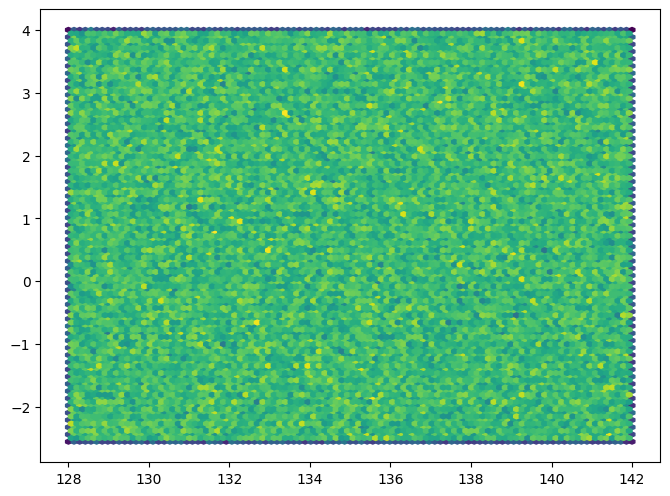

In [32]:
hscra = np.zeros(len(indices))
hscdec = np.zeros(len(indices))

for i in range(len(indices)):
    hscra[i] = HSC_G09_rands['ra'][indices[i]]
    hscdec[i] = HSC_G09_rands['dec'][indices[i]]

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(hscra,hscdec)


In [4]:
rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc.fits')
rands25x = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc_25xrand.fits')

In [40]:
HSC_count = 49305
random_sample_size = HSC_count*25
indices = np.random.randint(len(HSC_G09_rands), size = random_sample_size)

# indices = np.linspace(0,(HSC_count*25)-1,HSC_count*25,dtype=int)
# indices = np.random.choice(indices,size = len(indices),replace=True)
print(len(indices))

print("RAND (sampled) dec min:",np.min(HSC_G09_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G09_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G09_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G09_rands[indices]['ra']))

print("RAND (all) dec min:",np.min(HSC_G09_rands['dec']))
print("RAND (all) dec max:",np.max(HSC_G09_rands['dec']))
print("RAND (all) ra min:",np.min(HSC_G09_rands['ra']))
print("RAND (all) ra max:",np.max(HSC_G09_rands['ra']))

1232625
RAND (sampled) dec min: -2.5534748567795766
RAND (sampled) dec max: 3.999997907345765
RAND (sampled) ra min: 128.0000053777415
RAND (sampled) ra max: 141.99999013193565
RAND (all) dec min: -2.553483987017473
RAND (all) dec max: 3.999999914085134
RAND (all) ra min: 128.00000030427708
RAND (all) ra max: 141.99999916410866


In [36]:
print(indices[0:50])

[ 303275  774257 1225285  967055   66920 1159380  562689  281181  102977
  930580 1087679  319947   23817  560643 1088877  518775  914471  800869
  396203  773128  805638 1033038  504679  981764  455002 1120675  415147
  679004  558900  748910 1095083  987514  228967  145749 1114140 1078662
  559108  637247  411441  764145  592754  174373  462063  477955 1186270
  105049  939711  717146  140045  809396]


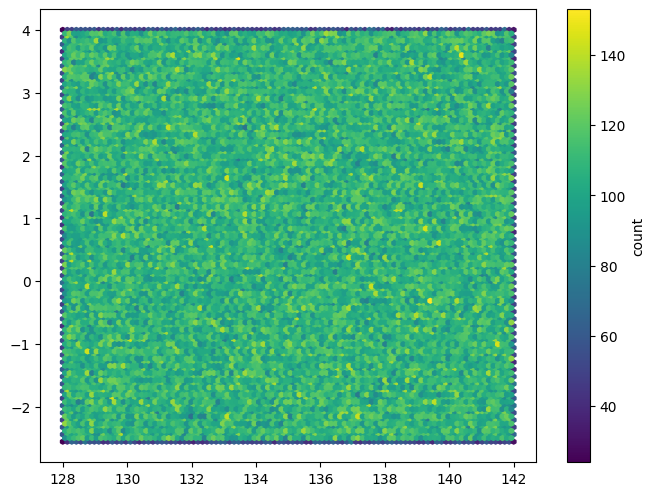

In [41]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(HSC_G09_rands[indices]['ra'],HSC_G09_rands[indices]['dec'])
cb=plt.colorbar()
cb.set_label('count')

In [3]:
print("RAND (sampled) dec min:",np.min(HSC_G09_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G09_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G09_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G09_rands[indices]['ra']))

RAND (sampled) dec min: -2.55347534105725
RAND (sampled) dec max: 3.999999914085134
RAND (sampled) ra min: 128.00000103021395
RAND (sampled) ra max: 141.99998872710145


In [13]:
a = 10
5 < a < 4

False

shuffle complete 1209350 randoms selected!


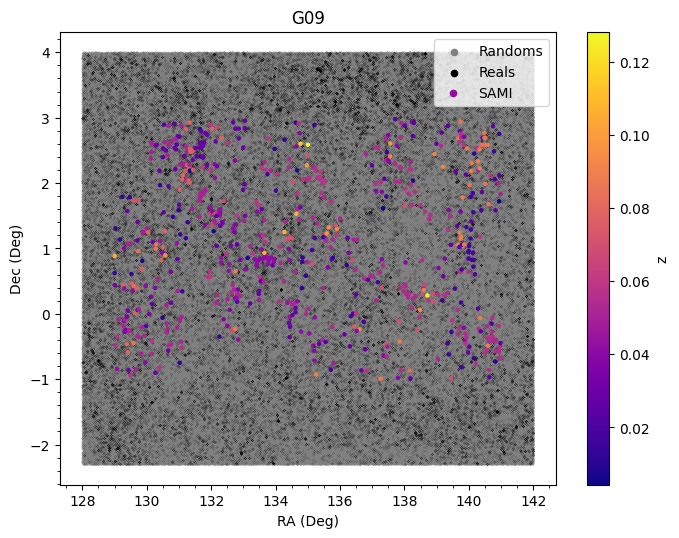

In [2]:
# now repeat for various z 
redshifts = [0.125]
HSC_count = 48374

# these were obtained from the reals calculation

for k in range(len(redshifts)):
    
    random_sample_size = HSC_count*25
    indices = np.random.randint(len(HSC_G09_rands), size = random_sample_size)
    print("shuffle complete", len(indices), "randoms selected!")
    
    plt.figure(figsize=(8,6),dpi=100)
    plt.scatter(HSC_G09_rands[indices]['ra'],HSC_G09_rands[indices]['dec'],s=0.01,c='grey',label="Randoms")
    plt.scatter(HSC_G09_gals['ra'],HSC_G09_gals['dec'],s=0.01,c='black',label="Reals")
    plt.scatter(SAMI_G09_gals['RA'],SAMI_G09_gals['DEC'],s=5,c=SAMI_G09_gals['Z_SPEC'],label="SAMI",cmap='plasma')
    cb = plt.colorbar()
    cb.set_label('z')
    plt.xlabel("RA (Deg)")
    plt.ylabel("Dec (Deg)")
    plt.minorticks_on()
    plt.title("G09")
    legend = plt.legend(loc="upper right",markerscale=1.0)
    for legobj in legend.legendHandles:
        legobj.set_sizes([20])
        
    filename = "/suphys/fscu5535/HSC_work/figures/G09realrandsamifixed.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 
    